In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('2025_11_10_dgiLIT_BCL2_anastasia.xlsx')
df.head(5)

,pmid,drug_name,gene_name,"Is the ""Drug"" a drug?","Is the ""gene"" a gene?",Is the interaction valid?,Did answer come from abstract or full text?,interaction_type,What type of interaction?,Inhibiting/Activating?,Confidence in Inhibiting/Activating Label,What is the best summary sentence from abstract for interaction?,Is the generated sentence real or hallucinated? ->,evidence
0,16983347,imatinib,Bax,Yes,Yes,Yes,Full Text,ACTIVATING,"activator, stimulator, inducer",Activating,2.0,matinib treatment led to the downregulation of...,Real,Imatinib did not modulate the expression or ac...
1,17927446,erlotinib,EGFR,Yes,Yes,Yes,Abstract,INHIBITING,"negative modulator, suppresor, multitarget",Inhibiting,2.0,NaN,Real,Mutations in the epidermal growth factor recep...
2,19234609,decitabine,CLU,Yes,Yes,Yes,Abstract,ACTIVATING,Gene to Drug,Activating,3.0,NaN,Real,identified the TGFbeta pathway genes CLU and T...
3,19234609,decitabine,TGFBI,Yes,Yes,Yes,Abstract,ACTIVATING,Gene to Drug,Activating,3.0,NaN,Real,identified the TGFbeta pathway genes CLU and T...
4,19330798,tamoxifen,BCAR1,Yes,Yes,Yes,Abstract,INHIBITING,"activator, stimulator, inducer",Activating,2.0,"TAM-R cells, which were established by long-te...",Real,Interference with p130(Cas) signaling/expressi...


In [3]:
for key in df:
    print(f'{key}: {df[key][0]}')

pmid: 16983347
drug_name: imatinib
gene_name: Bax
Is the "Drug" a drug?: Yes
Is the "gene" a gene?: Yes
Is the interaction valid?: Yes
Did answer come from abstract or full text?: Full Text
interaction_type: ACTIVATING
What type of interaction?: activator, stimulator, inducer
Inhibiting/Activating?: Activating
Confidence in Inhibiting/Activating  Label: 2.0
What is the best summary sentence from abstract for interaction?: matinib treatment led to the downregulation of Bcl-2 levels and the upregulation of Bax and p21WAF1 levels with respect to basal levels.
Is the generated sentence real or hallucinated? ->: Real
evidence: Imatinib did not modulate the expression or activation of its own targets, such as c-ABL, PDGFRalpha and PDGFRbeta, but it did affect the expression of c-FLIP(L), BCL2-associated X protein (Bax) and Bcl-2.


In [16]:
df['Inhibiting/Activating?'] = df['Inhibiting/Activating?'].str.upper()

print(f'Mismatch: {len(df[df["interaction_type"]!=df["Inhibiting/Activating?"]])}')
print(f'Agreement: {len(df[df["interaction_type"]==df["Inhibiting/Activating?"]])}')

Mismatch: 10
Agreement: 127


In [17]:
df['Is the interaction valid?'].value_counts()

Is the interaction valid?
Yes    134
No       3
Name: count, dtype: int64

In [18]:
df['Did answer come from abstract or full text?'].value_counts()

Did answer come from abstract or full text?
Abstract     129
Full Text      6
Name: count, dtype: int64

In [20]:
df['Is the generated sentence real or hallucinated? ->'].value_counts()

Is the generated sentence real or hallucinated? ->
Real    137
Name: count, dtype: int64

In [40]:
df['Confidence in Inhibiting/Activating  Label'].value_counts()

Confidence in Inhibiting/Activating  Label
3.0    89
2.0    45
1.0     1
Name: count, dtype: int64

In [24]:
tdf = df
tdf['What type of interaction?'] = tdf['What type of interaction?'].apply(lambda x: x.split(','))
tdf.explode('What type of interaction?')

AttributeError: 'float' object has no attribute 'split'

### Graphs

#### matplot

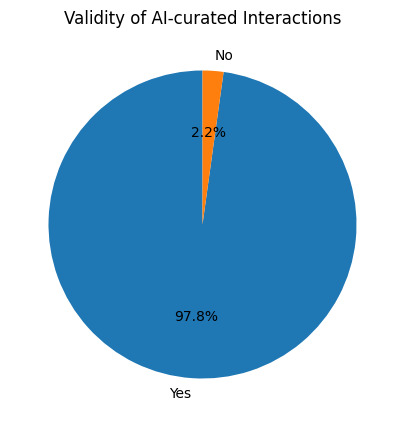

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the sample data (assuming df is your dataframe)
valid_counts = df['Is the interaction valid?'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 5))
plt.pie(valid_counts, labels=valid_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Validity of AI-curated Interactions')
plt.show()


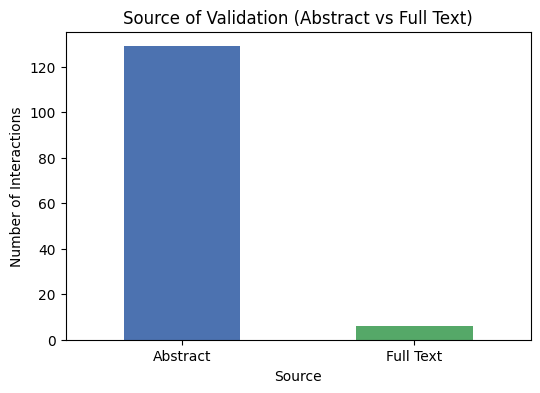

In [30]:
text_source_counts = df['Did answer come from abstract or full text?'].value_counts()

plt.figure(figsize=(6, 4))
text_source_counts.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title('Source of Validation (Abstract vs Full Text)')
plt.xlabel('Source')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=0)
plt.show()

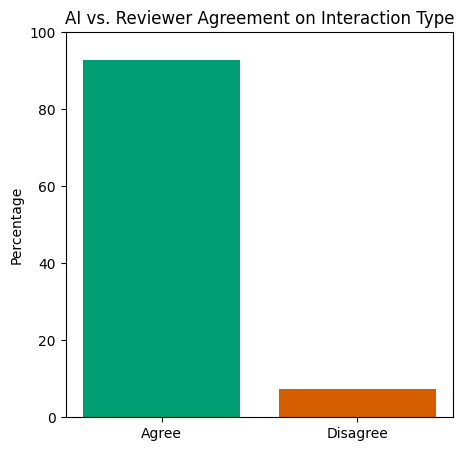

In [31]:
# Clean and uppercase both columns to avoid case mismatch
df['interaction_type'] = df['interaction_type'].str.upper()
df['Inhibiting/Activating?'] = df['Inhibiting/Activating?'].str.upper()

df['Agreement'] = df['interaction_type'] == df['Inhibiting/Activating?']

agreement_counts = df['Agreement'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 5))
plt.bar(['Agree', 'Disagree'], agreement_counts, color=['#009E73', '#D55E00'])
plt.title('AI vs. Reviewer Agreement on Interaction Type')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()


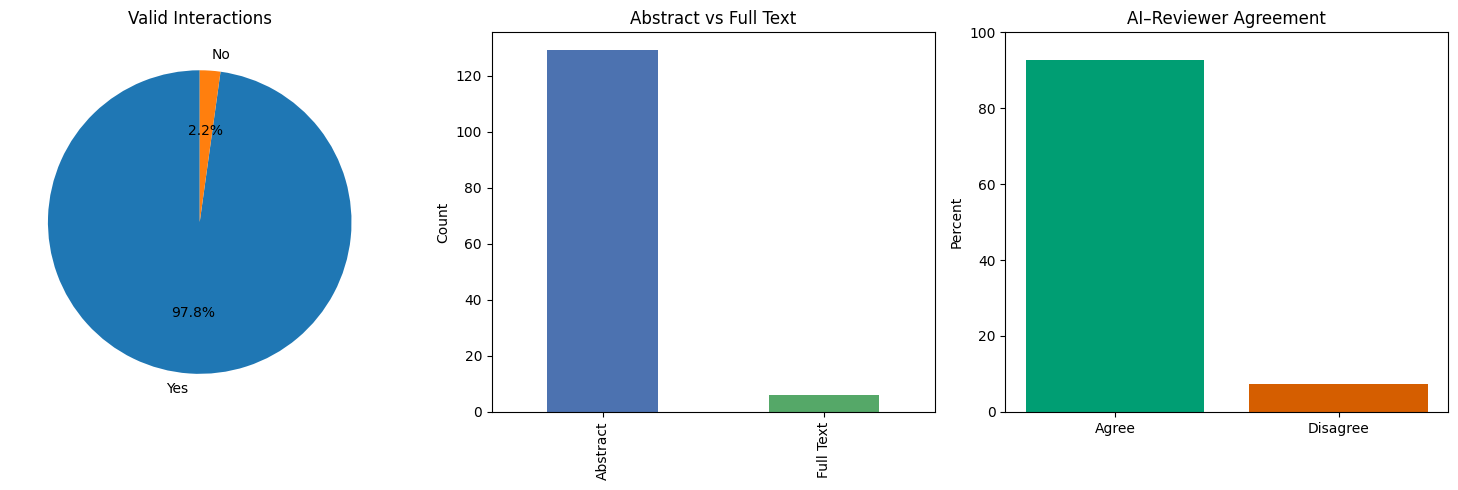

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# (1) Validity
valid_counts.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Valid Interactions')
axes[0].set_ylabel('')

# (2) Source
text_source_counts.plot.bar(ax=axes[1], color=['#4C72B0', '#55A868'])
axes[1].set_title('Abstract vs Full Text')
axes[1].set_xlabel('')
axes[1].set_ylabel('Count')

# (3) Agreement
axes[2].bar(['Agree', 'Disagree'], agreement_counts, color=['#009E73', '#D55E00'])
axes[2].set_title('AI–Reviewer Agreement')
axes[2].set_ylabel('Percent')
axes[2].set_ylim(0, 100)

plt.tight_layout()
plt.show()


#### Plotly

In [33]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# Normalize text casing
df['interaction_type'] = df['interaction_type'].str.upper()
df['Inhibiting/Activating?'] = df['Inhibiting/Activating?'].str.upper()

# Compute agreement between AI and human reviewer
df['Agreement'] = df['interaction_type'] == df['Inhibiting/Activating?']


In [35]:
valid_fig = px.pie(
    df,
    names='Is the interaction valid?',
    title='✅ Validity of AI-curated Interactions',
    color='Is the interaction valid?',
    color_discrete_map={'Yes': '#2ECC71', 'No': '#E74C3C'},
    hole=0.4
)
valid_fig.update_traces(textinfo='percent+label', pull=[0.05, 0])
valid_fig.update_layout(showlegend=True)
valid_fig.show()


In [36]:
text_fig = px.bar(
    df,
    x='Did answer come from abstract or full text?',
    color='Did answer come from abstract or full text?',
    color_discrete_map={'Abstract': '#3498DB', 'Full Text': '#F1C40F'},
    title='📚 Source of Validation: Abstract vs. Full Text',
)
text_fig.update_layout(
    xaxis_title='Source',
    yaxis_title='Number of Interactions',
    showlegend=False
)
text_fig.show()


In [37]:
agreement_percent = (df['Agreement'].mean() * 100)

agreement_fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=agreement_percent,
    title={'text': "⚖️ AI vs Reviewer Agreement"},
    gauge={'axis': {'range': [0, 100]},
           'bar': {'color': "#2E86DE"},
           'steps': [
               {'range': [0, 50], 'color': "#F1948A"},
               {'range': [50, 80], 'color': "#F7DC6F"},
               {'range': [80, 100], 'color': "#82E0AA"}
           ]}
))
agreement_fig.update_layout(height=400)
agreement_fig.show()


In [79]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Counts & metrics ---
valid_counts = df['Is the interaction valid?'].value_counts()
source_counts = df['Did answer come from abstract or full text?'].value_counts()
agreement_percent = round(df['Agreement'].mean() * 100, 1)

# --- Create Subplots Layout ---
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type':'domain'}, {'type':'xy'}, {'type':'indicator'}]],
    subplot_titles=[
        "<b>Interaction Validity</b>",
        "<b>Depth for Validation</b>",
        "<b>Interaction Directionality Agreement</b>"
    ]
)

# --- (1) Validity Pie ---
fig.add_trace(
    go.Pie(
        labels=valid_counts.index,
        values=valid_counts.values,
        hole=0.45,
        marker=dict(colors=['#2ECC71', '#E74C3C'],
                    line=dict(color='white', width=2)),
        textinfo='label+percent',
        textfont=dict(size=14, color='black'),
    ),
    1, 1
)

# --- (2) Source Bar ---
fig.add_trace(
    go.Bar(
        x=source_counts.index,
        y=source_counts.values,
        marker_color=['#3498DB', '#F1C40F'],
        text=source_counts.values,
        textposition='outside',
        textfont=dict(size=14),
        hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>'
    ),
    1, 2
)

# --- (3) Gauge ---
fig.add_trace(
    go.Indicator(
        mode="gauge+number",
        value=agreement_percent,
        delta={'reference': 80, 'increasing': {'color': '#27AE60'}, 'decreasing': {'color': '#E74C3C'}},
        title={'text': "<b>Agreement (%)</b>", 'font': {'size': 18}},
        number={'font': {'size': 40}},
        gauge={
            'axis': {'range': [0, 100], 'tickwidth': 1, 'tickcolor': "darkgray"},
            'bar': {'color': "#2E86DE"},
            'bgcolor': "white",
            'borderwidth': 2,
            'bordercolor': "gray",
            'steps': [
                {'range': [0, 50], 'color': "#FADBD8"},
                {'range': [50, 80], 'color': "#FCF3CF"},
                {'range': [80, 100], 'color': "#D5F5E3"}
            ],
            'threshold': {
                'line': {'color': "#1B4F72", 'width': 4},
                'thickness': 0.75,
                'value': agreement_percent
            }
        }
    ),
    1, 3
)

# --- Layout Tweaks for Professional Look ---
fig.update_layout(
    title=dict(
        text="<b>Human Evaluation of AI Curator</b><br><sup>Interaction Validity, Depth for Validation, and Interaction Type Agreement</sup>",
        x=0.5,
        xanchor='center',
        font=dict(size=24)
    ),
    font=dict(family="Arial", size=14, color="#2F2F2F"),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    height=550,
    width=1250,
    margin=dict(l=40, r=40, t=120, b=40),
)

# --- Axis and Label Styling ---
fig.update_xaxes(showgrid=False, showline=False, zeroline=False)
fig.update_yaxes(showgrid=False, showline=False, zeroline=False)

# --- Add subtle divider lines between panels (optional aesthetic touch) ---
fig.add_shape(type="line",
              x0=0.333, x1=0.333, y0=0, y1=1,
              xref="paper", yref="paper",
              line=dict(color="lightgray", width=1, dash="dot"))
fig.add_shape(type="line",
              x0=0.666, x1=0.666, y0=0, y1=1,
              xref="paper", yref="paper",
              line=dict(color="lightgray", width=1, dash="dot"))

fig.show()
fig.write_image("ai_curation_dashboard-d1.png", scale=4, width=1200, height=600)



In [78]:
import pandas as pd
import plotly.express as px

# --- Copy and clean ---
tdf = df.copy()

# Ensure column is string before splitting (handle NaN safely)
tdf['What type of interaction?'] = (
    tdf['What type of interaction?']
    .fillna('')  # replace NaN with empty string
    .astype(str)
    .apply(lambda x: [s.strip().capitalize() for s in x.split(',') if s.strip() != ''])
)

# --- Explode into one row per interaction type ---
tdf = tdf.explode('What type of interaction?')

# --- Drop empty values ---
tdf = tdf[tdf['What type of interaction?'].notna() & (tdf['What type of interaction?'] != '')]

# --- Count frequency ---
interaction_counts = tdf['What type of interaction?'].value_counts().reset_index()
interaction_counts.columns = ['Interaction Type', 'Count']

# --- Plotly Pie Chart ---
fig = px.pie(
    interaction_counts,
    names='Interaction Type',
    values='Count',
    title='',
    color='Interaction Type',
    color_discrete_sequence=px.colors.qualitative.Safe,
    hole=0.35
)

fig.update_traces(
    textinfo='label+percent',
    textfont_size=14,
    pull=[0.05 if i == 0 else 0 for i in range(len(interaction_counts))],
    marker=dict(line=dict(color='white', width=2))
)

fig.update_layout(
    title=dict(x=0.5, xanchor='center', font=dict(size=22)),
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.show()
fig.write_image("interaction_type_pie.png", scale=3, width=1200, height=800)



#### Mosaic

In [47]:
import pandas as pd
import plotly.express as px
import numpy as np
df = df.sort_values(['Did answer come from abstract or full text?', 'gene_name'])

# --- Preprocessing ---
df['interaction_type'] = df['interaction_type'].str.upper()
df['Inhibiting/Activating?'] = df['Inhibiting/Activating?'].str.upper()

# Whether AI agrees with human label
df['Agreement'] = df['interaction_type'] == df['Inhibiting/Activating?']

# Map validity to colors
df['Validity_Color'] = df['Is the interaction valid?'].map({'Yes': '#2ECC71', 'No': '#E74C3C'})

# Map agreement to opacity (1 = full agreement, 0.4 = disagreement)
df['Opacity'] = df['Agreement'].map({True: 1.0, False: 0.4})

# --- Grid layout ---
n = len(df)
cols = int(np.ceil(np.sqrt(n)))   # roughly square layout
rows = int(np.ceil(n / cols))

# Assign grid coordinates
df['x'] = np.tile(np.arange(cols), rows)[:n]
df['y'] = np.repeat(np.arange(rows), cols)[:n]

fig = px.scatter(
    df,
    x='x',
    y='y',
    color='Is the interaction valid?',
    color_discrete_map={'Yes': '#2ECC71', 'No': '#E74C3C'},
    opacity=df['Opacity'],
    symbol_sequence=['square'],
    hover_data={
        'pmid': True,
        'drug_name': True,
        'gene_name': True,
        'interaction_type': True,
        'Inhibiting/Activating?': True,
        'Is the interaction valid?': True,
        'Did answer come from abstract or full text?': True,
        'Agreement': True,
        'x': False,
        'y': False
    },
    title='🧠 AI Curation Mosaic — Validity and Agreement Overview'
)



fig.update_traces(marker=dict(size=16, line=dict(width=0.5, color='black')))
fig.update_layout(
    yaxis=dict(autorange='reversed', visible=False),
    xaxis=dict(visible=False),
    plot_bgcolor='white',
    showlegend=True,
    height=700,
)

df['Outline'] = df['Agreement'].map({True: 'black', False: 'gray'})
fig.update_traces(marker=dict(size=16, line=dict(width=1, color=df['Outline'])))



fig.show()



In [77]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# --- Data Preparation ---
df['interaction_type'] = df['interaction_type'].str.upper()
df['Inhibiting/Activating?'] = df['Inhibiting/Activating?'].str.upper()
df['Agreement'] = df['interaction_type'] == df['Inhibiting/Activating?']

# Color and opacity mappings
df['color'] = df['Is the interaction valid?'].map({'Yes': '#2ECC71', 'No': '#E74C3C'})
df['opacity'] = df['Agreement'].map({True: 1.0, False: 0.4})

# Grid layout (auto-scaling)
n = len(df)
cols = int(np.ceil(np.sqrt(n)))
rows = int(np.ceil(n / cols))
df['x'] = np.tile(np.arange(cols), rows)[:n]
df['y'] = np.repeat(np.arange(rows), cols)[:n]

# --- Plot Setup ---
fig = go.Figure()

# Squares (tiles)
for _, row in df.iterrows():
    fig.add_shape(
        type='rect',
        x0=row['x'], x1=row['x'] + 1,
        y0=row['y'], y1=row['y'] + 1,
        line=dict(width=0.5, color='rgba(0,0,0,0.3)'),
        fillcolor=row['color'],
        opacity=row['opacity'],
        layer='below'
    )

# Hover points (for tooltips)
fig.add_trace(go.Scatter(
    x=df['x'] + 0.5,
    y=df['y'] + 0.5,
    mode='markers',
    marker=dict(size=0.1, opacity=0),
    hoverinfo='text',
    hovertext=[
        f"<b>PMID:</b> {pmid}<br>"
        f"<b>Drug:</b> {drug}<br>"
        f"<b>Gene:</b> {gene}<br>"
        f"<b>Valid:</b> {valid}<br>"
        f"<b>Agreement:</b> {'Yes' if agree else 'No'}<br>"
        f"<b>Source:</b> {src}"
        for pmid, drug, gene, valid, agree, src in zip(
            df['pmid'],
            df['drug_name'],
            df['gene_name'],
            df['Is the interaction valid?'],
            df['Agreement'],
            df['Did answer come from abstract or full text?']
        )
    ]
))

# --- Layout ---
fig.update_layout(
    title=dict(
        text="Human Evaluation of AI Curator",
        x=0.5, xanchor='center', font=dict(size=22)
    ),
    xaxis=dict(visible=False),
    yaxis=dict(visible=False, autorange='reversed'),
    plot_bgcolor='white',
    width=900,
    height=700,
    margin=dict(l=40, r=40, t=90, b=120),
    showlegend=False,
)

# --- Add legend BELOW chart ---
legend_items = [
    ("#2ECC71", 1.0, "Valid & Agree"),
    ("#2ECC71", 0.4, "Valid but Disagree"),
    ("#E74C3C", 1.0, "Invalid & Agree"),
    ("#E74C3C", 0.4, "Invalid & Disagree")
]

# Legend positioned in figure coordinates below the mosaic
legend_y = -0.15
for i, (color, opacity, label) in enumerate(legend_items):
    x_offset = (i - 1.5) * 1.8  # spread out evenly
    fig.add_shape(
        type="rect",
        xref="paper", yref="paper",
        x0=0.5 + x_offset - 0.05, x1=0.5 + x_offset + 0.05,
        y0=legend_y, y1=legend_y + 0.05,
        fillcolor=color, opacity=opacity,
        line=dict(width=1, color='black')
    )
    fig.add_annotation(
        xref="paper", yref="paper",
        x=0.5 + x_offset + 0.08, y=legend_y + 0.025,
        text=label,
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        font=dict(size=12)
    )

fig.show()
# --- SAVE STATIC IMAGE ---
fig.write_image("ai_curation_mosaic.png", scale=4, width=1800, height=1400)

